# 1. Write a Python program to simulate the following scenarios:

## a. Tossing a coin 10,000 times and calculating the experimental probability of heads and tails.

In [2]:
import random

heads = 0
tails = 0
for _ in range(10000):
    if random.choice(['heads', 'tails']) == 'heads':
        heads += 1
    else:
        tails += 1

print("Probability of heads:", heads / 10000)
print("Probability of tails:", tails / 10000)


Probability of heads: 0.5055
Probability of tails: 0.4945


### We toss a coin 10,000 times and count how many times we get heads and tails. We divide by 10,000 to get the probability.

## b. Rolling two dice and computing the probability of getting a sum of 7.

In [3]:
count_7 = 0
for _ in range(10000):
    die1 = random.randint(1, 6)
    die2 = random.randint(1, 6)
    if die1 + die2 == 7:
        count_7 += 1

print("Probability of sum 7:", count_7 / 10000)


Probability of sum 7: 0.1654


### We roll two dice 10,000 times and count how many times the sum is 7. The probability is the count divided by 10,000.

# 2. Write a function to estimate the probability of getting at least one "6" in 10 rolls of a fair die.

In [4]:
success = 0
for _ in range(10000):
    got_six = False
    for _ in range(10):
        if random.randint(1, 6) == 6:
            got_six = True
            break
    if got_six:
        success += 1

print("Probability of at least one 6 in 10 rolls:", success / 10000)


Probability of at least one 6 in 10 rolls: 0.8357


## We roll a die 10 times in each trial. If any roll is a 6, we count it as a success. We repeat this 10,000 times and calculate the probability.

# 3. A bag contains 5 red, 7 green, and 8 blue balls. A ball is drawn randomly, its color noted, and it is put back into the bag. If this process is repeated 1000 times, write a Python program to estimate:

## a. Probability of drawing a red ball given the previous was blue

In [5]:
import random

balls = ['red'] * 5 + ['green'] * 7 + ['blue'] * 8
red_after_blue = 0
blue_before = 0
prev = None

for _ in range(1000):
    ball = random.choice(balls)
    if prev == 'blue':
        blue_before += 1
        if ball == 'red':
            red_after_blue += 1
    prev = ball

if blue_before > 0:
    print("Probability of red after blue:", red_after_blue / blue_before)
else:
    print("No blue balls drawn before.")


Probability of red after blue: 0.21558441558441557


### We draw a ball, put it back, and repeat 1000 times. We count how often a red follows a blue and divide by the number of times blue was drawn before.

# 4. Generate a sample of size 1000 from a discrete random variable with the following distribution:  
  - P(X=1) = 0.25  
  - P(X=2) = 0.35  
  - P(X=3) = 0.4  
  Compute the empirical mean, variance, and standard deviation of the sample.


In [5]:
import numpy as np

values = [1, 2, 3]
probs = [0.25, 0.35, 0.4]
sample = np.random.choice(values, size=1000, p=probs)

print("Mean:", np.mean(sample))
print("Variance:", np.var(sample))
print("Standard deviation:", np.std(sample))


Mean: 2.177
Variance: 0.6196710000000001
Standard deviation: 0.7871918444699488


## We randomly pick numbers 1, 2, or 3 based on their probabilities 1000 times, then calculate mean, variance, and standard deviation.

# 5. Simulate 2000 random samples from an exponential distribution with a mean of 5. Visualize the distribution using:

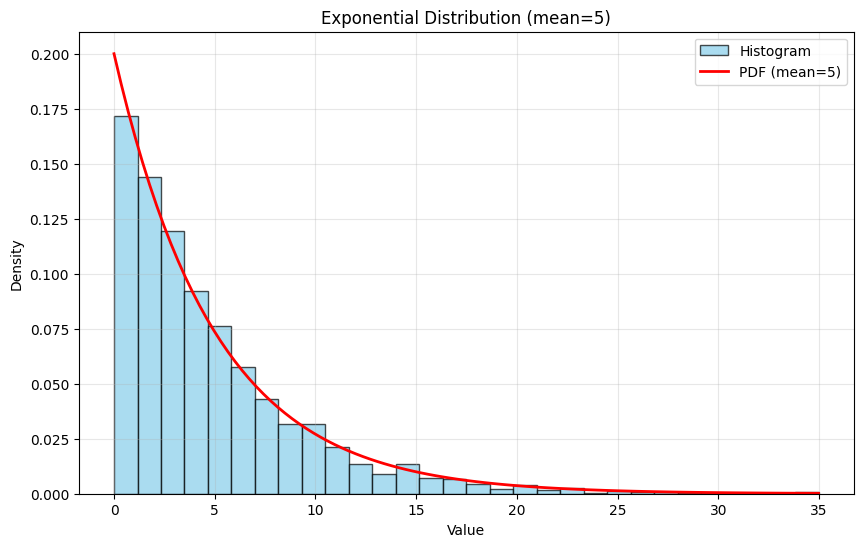

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate 2000 random samples from exponential distribution
# Mean = 5, so we set scale=5
samples = np.random.exponential(scale=5, size=2000)

# Step 2: Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(samples, bins=30, density=True, color='skyblue', edgecolor='black', alpha=0.7, label='Histogram')

# Step 3: Create the PDF overlay
# Generate x-values from 0 to max sample value
x = np.linspace(0, samples.max(), 100)

# Calculate PDF: (1/mean)*e^(-x/mean)
pdf = (1/5) * np.exp(-x/5)

# Plot the PDF
plt.plot(x, pdf, 'r-', linewidth=2, label='PDF (mean=5)')

# Step 4: Add labels and title
plt.title('Exponential Distribution (mean=5)')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


# 6. Simulate the Central Limit Theorem by following these steps  
  a. Generate 10,000 random numbers from a uniform distribution.  
  b. Draw 1000 samples of size n = 30.  
  c. Calculate and visualize the distribution of sample means. 

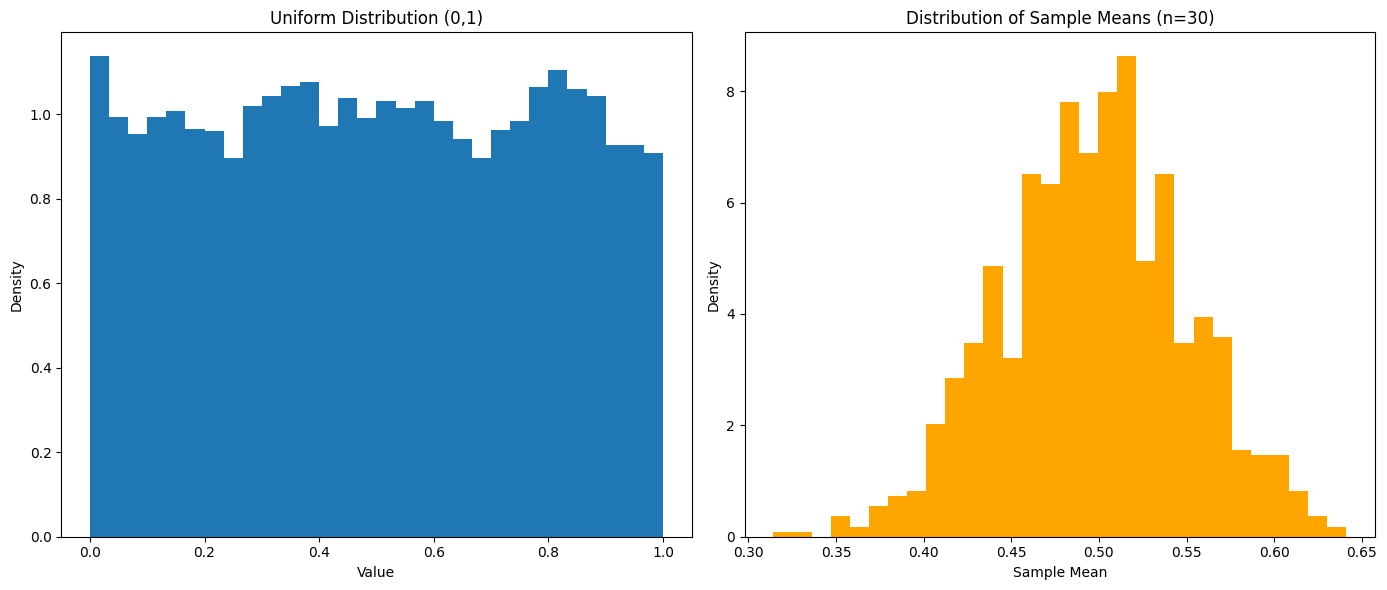

Original Mean: 0.4972
Sample Means Mean: 0.4970
Sample Means Std Dev: 0.0524
Theoretical Std Error: 0.0526


In [2]:
# Generate uniform distribution
uniform_samples = np.random.uniform(0, 1, 10000)

# Draw 1000 samples of size 30
sample_means = [np.random.choice(uniform_samples, 30).mean() for _ in range(1000)]

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Uniform distribution
ax1.hist(uniform_samples, bins=30, density=True)
ax1.set_title('Uniform Distribution (0,1)')
ax1.set_xlabel('Value')
ax1.set_ylabel('Density')

# Sample means distribution
ax2.hist(sample_means, bins=30, density=True, color='orange')
ax2.set_title('Distribution of Sample Means (n=30)')
ax2.set_xlabel('Sample Mean')
ax2.set_ylabel('Density')

plt.tight_layout()
plt.show()

# CLT statistics
print(f"Original Mean: {np.mean(uniform_samples):.4f}")
print(f"Sample Means Mean: {np.mean(sample_means):.4f}")
print(f"Sample Means Std Dev: {np.std(sample_means):.4f}")
print(f"Theoretical Std Error: {np.std(uniform_samples)/np.sqrt(30):.4f}")
